In [2]:
# Import Libraries
import pandas as pd
import numpy as np

In [3]:
# 데이터 준비
df = pd.read_csv("data/credit_card_churn.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [113]:
# 데이터 전처리
## 결측치 처리방법 및 이유
## 이상치 판정 기준과 처리방법 밑 이유
## Feature Engineering 방식 기술: label encoder


In [114]:
df.isna().sum() # 컬럼별 결측치 개수

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [115]:
# Delete the 'Gender' column
df.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<Figure size 3000x3000 with 0 Axes>

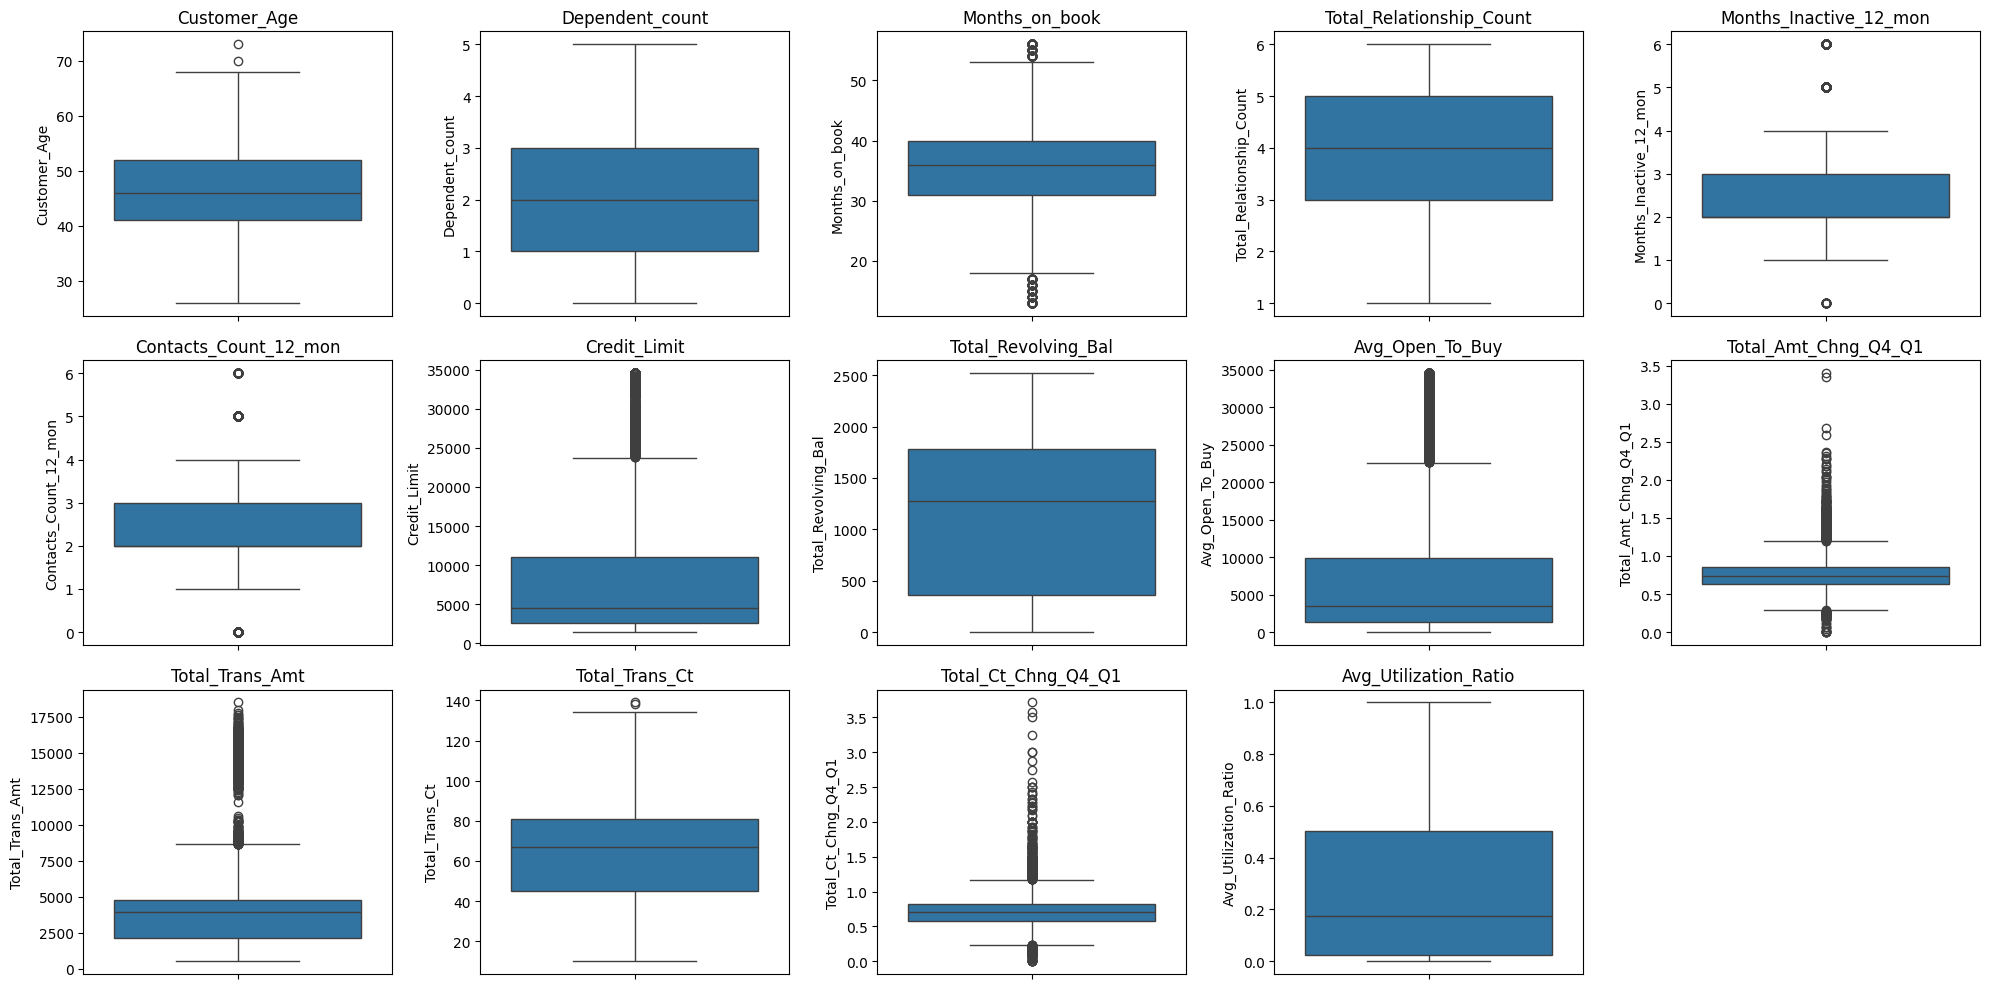

In [116]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

selected_vars = ["Customer_Age", "Dependent_count", "Months_on_book", 
                 "Total_Relationship_Count", "Months_Inactive_12_mon", 
                 "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal",
                 "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt",
                 "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

# Set the plot size
plt.figure(figsize=(20, 10))

# Iterate over the selected variables and create a boxplot for each one
for i, col in enumerate(selected_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [13]:
np.unique(df["Total_Amt_Chng_Q4_Q1"].values, return_counts=True)

(array([0.   , 0.01 , 0.018, ..., 2.675, 3.355, 3.397]),
 array([5, 1, 1, ..., 1, 1, 1]))

In [12]:
np.unique(df["Total_Trans_Amt"].values, return_counts=True)

(array([  510,   530,   563, ..., 17744, 17995, 18484]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [11]:
np.unique(df["Total_Trans_Ct"].values, return_counts=True)

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 134, 138, 139]),
 array([  4,   2,   4,   5,   9,  16,  13,  13,  23,  11,  19,  33,  35,
         34,  50,  57,  56,  82,  73,  75,  84, 100, 104, 116, 107, 136,
        135, 141, 139, 126, 136, 138, 132, 147, 127, 129, 100, 110,  98,
        118,  91,  92,  64,  85,  89,  78, 106,  94, 103,  97, 111, 1

In [10]:
np.unique(df["Total_Ct_Chng_Q4_Q1"].values, return_counts=True)

(array([0.   , 0.028, 0.029, 0.038, 0.053, 0.059, 0.062, 0.074, 0.077,
        0.091, 0.097, 0.103, 0.105, 0.107, 0.111, 0.119, 0.125, 0.13 ,
        0.133, 0.143, 0.147, 0.15 , 0.154, 0.161, 0.162, 0.167, 0.171,
        0.172, 0.174, 0.176, 0.179, 0.182, 0.185, 0.188, 0.189, 0.19 ,
        0.192, 0.194, 0.2  , 0.206, 0.207, 0.208, 0.211, 0.212, 0.214,
        0.217, 0.222, 0.226, 0.227, 0.231, 0.233, 0.235, 0.238, 0.24 ,
        0.241, 0.242, 0.244, 0.25 , 0.256, 0.257, 0.259, 0.261, 0.262,
        0.263, 0.265, 0.267, 0.269, 0.273, 0.275, 0.276, 0.278, 0.28 ,
        0.281, 0.282, 0.286, 0.29 , 0.292, 0.293, 0.294, 0.295, 0.296,
        0.297, 0.3  , 0.303, 0.304, 0.306, 0.308, 0.31 , 0.312, 0.314,
        0.316, 0.317, 0.318, 0.32 , 0.321, 0.323, 0.324, 0.327, 0.333,
        0.341, 0.343, 0.344, 0.345, 0.346, 0.347, 0.348, 0.349, 0.35 ,
        0.351, 0.353, 0.355, 0.357, 0.359, 0.36 , 0.361, 0.362, 0.364,
        0.367, 0.368, 0.37 , 0.371, 0.372, 0.375, 0.378, 0.379, 0.381,
      

In [9]:
np.unique(df["Avg_Utilization_Ratio"].values, return_counts=True)

(array([0.   , 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.011,
        0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02 ,
        0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029,
        0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038,
        0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047,
        0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054, 0.055, 0.056,
        0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063, 0.064, 0.065,
        0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072, 0.073, 0.074,
        0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081, 0.082, 0.083,
        0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 , 0.091, 0.092,
        0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1  , 0.101,
        0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11 ,
        0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119,
        0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128,
      

In [14]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [117]:
def find_outliers(df, column_name, whis=1.5):
    """
    분위수 기준으로 이상치를 찾는 함수

    Parameters:
    df (pd.DataFrame): 데이터프레임
    column_name (str): 이상치를 찾을 컬럼명

    Returns:
    pd.Series: 이상치 값들
    """
    q1, q3 = df[column_name].quantile(q=[0.25, 0.75])
    iqr = q3 - q1
    iqr *= whis
    return df.loc[~df[column_name].between(q1 - iqr, q3 + iqr), column_name].index

In [120]:
outliers = find_outliers(df , 'Customer_Age')
print(outliers)
outliers = find_outliers(df, 'Total_Trans_Ct')
print(outliers)

Index([], dtype='int64')
Index([], dtype='int64')


In [118]:
out = ['Customer_Age','Total_Trans_Ct']
for i in out : 
    print(i)
    outliers = find_outliers(df , i)
    for outlier in outliers:
        print(outlier)
        df = df.drop(index=outlier, axis=0)
# df 에 이상치 제거

Customer_Age
251
254
Total_Trans_Ct
9324
9586


In [121]:
# 언노운 값을 NA 값으로 변환 후 최빈값으로 결측치 처리,  income unknown 은 레이블 인코딩 후 결측치 처리
df2 = df.copy()
df2["Education_Level"]=df2["Education_Level"].replace("Unknown",pd.NA)
df2["Marital_Status"]=df2["Marital_Status"].replace("Unknown",pd.NA)
# df2["Income_Category"]=df2["Income_Category"].replace("Unknown",pd.NA)
df2["Education_Level"]=df2["Education_Level"].fillna(df['Education_Level'].mode()[0])
df2["Marital_Status"]=df2["Marital_Status"].fillna(df['Marital_Status'].mode()[0])

In [151]:
df2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Married,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [183]:
category_columns = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
number_columns = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]
# 'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Dependent_count',

In [152]:
le_dict['Income_Category'].classes_

array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], dtype=object)

In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

category_columns = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']
number_columns = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]
# 'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Dependent_count' 제외
df3 = df2.copy() 
le_dict = {}
for col in category_columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])  # df3 : 결측치 처리완료한 데이터
    le_dict[col] = le # dictionary[컬럼명, LabelEncoder객체]

for col2 in number_columns:
    # 객체 생성
    s_scaler = StandardScaler()
    df3[[col2]] = s_scaler.fit_transform(df3[[col2]]) # 학습/변환 대상이 같은 경우.

df3["Attrition_Flag"]=df3["Attrition_Flag"].replace("Existing Customer",0)
df3["Attrition_Flag"]=df3["Attrition_Flag"].replace("Attrited Customer",1)
df3


C:\Users\Playdata\AppData\Local\Temp\ipykernel_16688\4070623648.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3["Attrition_Flag"]=df3["Attrition_Flag"].replace("Attrited Customer",1)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,-0.164876,1,3,3,1,2,0,0.385093,5,1,3,0.447021,-0.473271,0.489372,2.624244,-0.959910,-0.974671,3.836545,-0.775870
1,0,0.334537,0,5,2,2,4,0,1.011346,6,1,2,-0.041104,-0.366519,-0.008226,3.564242,-0.916610,-1.358533,12.615880,-0.616282
2,0,0.584243,1,3,2,1,3,0,0.009342,4,1,0,-0.573583,-1.426676,-0.445522,8.369183,-0.741056,-1.912999,6.812021,-0.997116
3,0,-0.789142,0,4,3,1,4,0,-0.241160,3,4,1,-0.585139,1.661768,-0.734045,2.943661,-0.951957,-1.912999,6.812021,1.759392
4,0,-0.789142,1,3,5,1,2,0,-1.869417,5,1,0,-0.430723,-1.426676,-0.302691,6.457246,-1.056523,-1.571789,7.513863,-0.997116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.459390,1,2,2,2,1,0,0.510344,3,2,3,-0.509197,0.844564,-0.584832,-0.259633,3.261634,2.224172,0.608910,0.678551
10123,1,-0.664288,1,2,2,0,1,0,-1.368414,4,2,3,-0.479040,1.255620,-0.591544,0.201240,1.284590,0.176912,-0.122351,0.856273
10124,1,-0.289729,0,1,3,1,4,0,0.009342,5,3,4,-0.354450,-1.426676,-0.226434,0.269687,1.734373,-0.206949,0.445006,-0.997116
10125,1,-2.037673,1,2,2,1,1,0,0.009342,4,3,3,-0.368538,-1.426676,-0.240519,-1.026233,1.175899,-0.121646,0.041552,-0.997116


In [168]:
le_dict['Gender'].classes_

array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], dtype=object)

In [177]:
le_dict['Attrition_Flag'].classes_

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [138]:
# df3["Income_Category"]=df3["Income_Category"].replace(5,"")

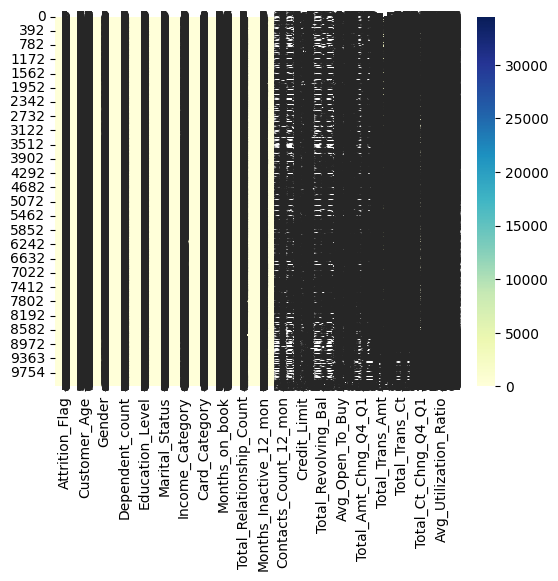

<Figure size 3000x3000 with 0 Axes>

In [173]:
import matplotlib.pyplot as plt

sns.heatmap(df3, annot=True, cmap="YlGnBu")
plt.figure(figsize=(100, 100))
plt.show()

In [ ]:
! pip install seaborn

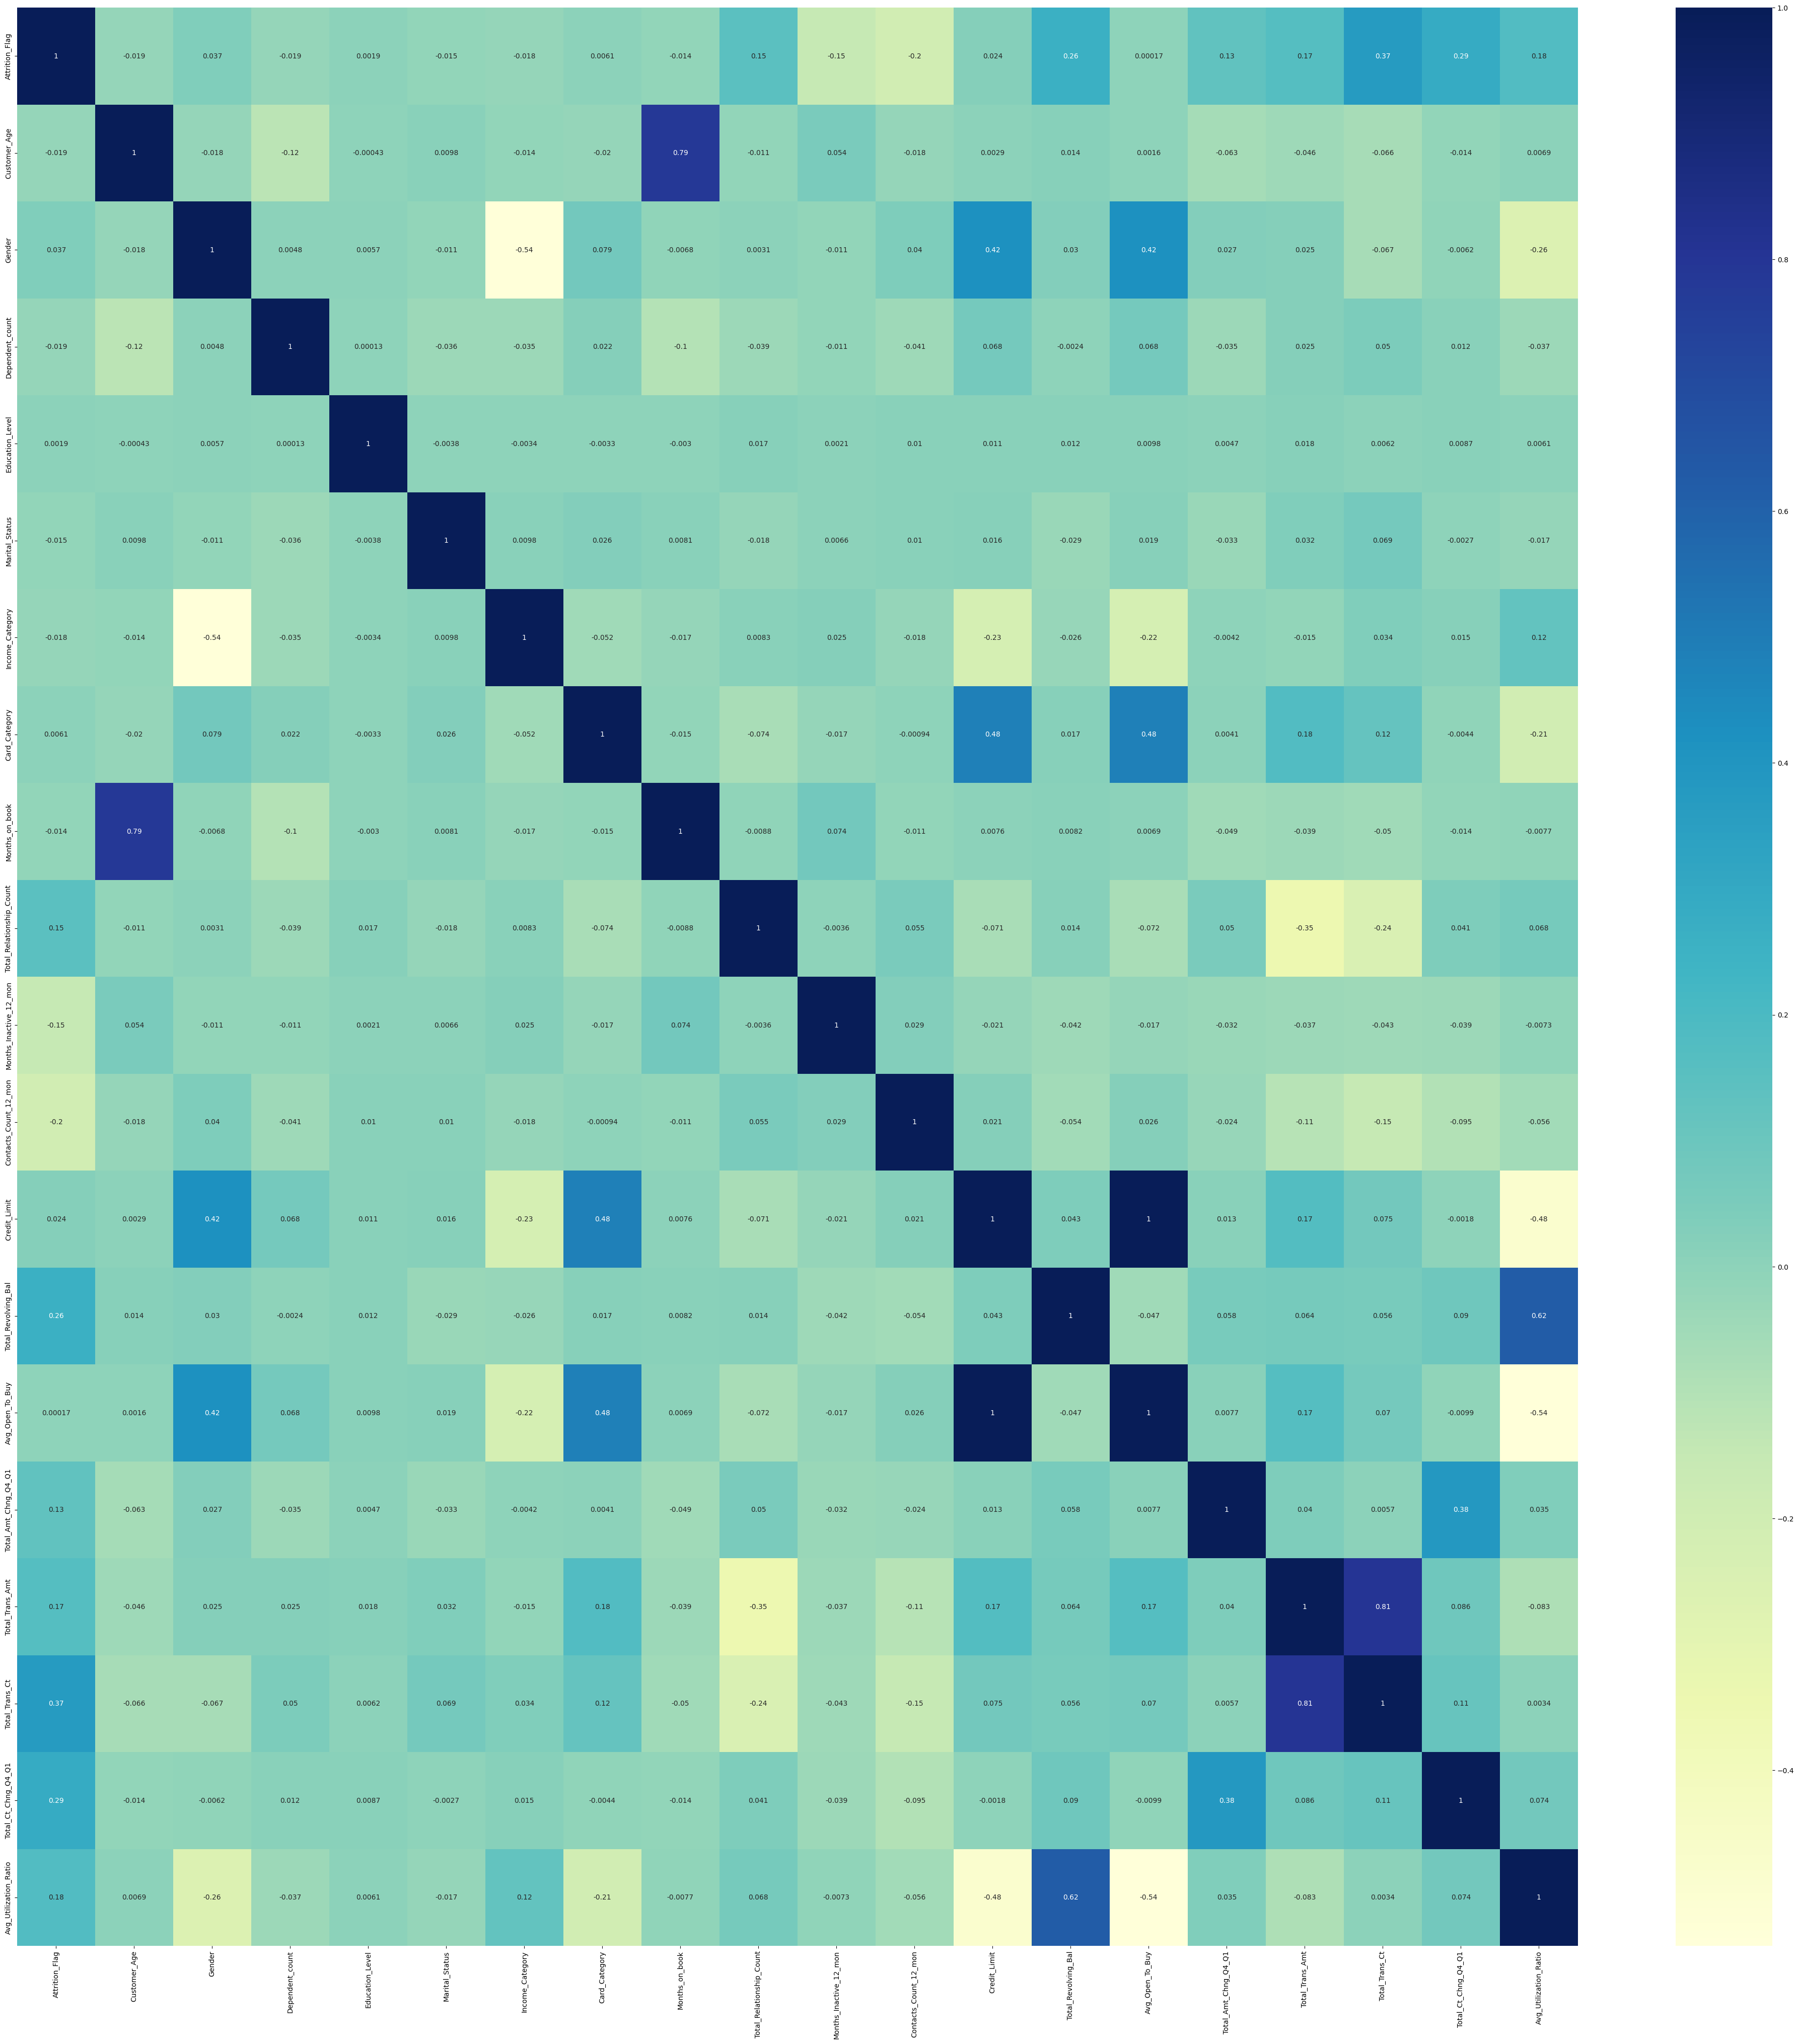

In [191]:
import seaborn as sns 
plt.figure(figsize=(50, 50))
sns.heatmap(df3.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [169]:
df3

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,1,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,2,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,1,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [155]:
np.unique(df3["Income_Category"].values,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 726, 1789, 1402, 1535, 3560, 1111]))

In [163]:
from sklearn.neighbors import NearestNeighbors
df4 = df3.copy()




neigh = NearestNeighbors(n_neighbors=2, metric='hamming')
neigh.fit(df4[['Income_Category']])


# 3. 결측치가 있는 행 인덱스 찾기
missing_index = df4[df4['Income_Category'] == 5].index

for idx in missing_index:
    # 가장 가까운 이웃 찾기 (자기 자신 제외)
    neighbors = neigh.kneighbors([df4.loc[idx, ['Income_Category']]], return_distance=False)
    neighbor_cities = df4.loc[neighbors[0][1:], 'Income_Category']  # 첫 번째 이웃은 자기 자신이므로 제외
    # print(neighbor_cities)
#     # 최빈값으로 결측치 대체
#     most_common = neighbor_cities.value_counts().idxmax()
#     df4.at[idx, 'Income_Category'] = most_common

# print(missing_index)

C:\Users\Playdata\AppData\Local\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Playdata\AppData\Local\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Playdata\AppData\Local\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Playdata\AppData\Local\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Playdata\AppData\Local\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fit

In [160]:
np.unique(df4["Income_Category"].values,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 726, 1789, 1402, 1535, 3560, 1111]))

In [133]:
df4 = df3.copy()
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)  # K - 가까운 데이터포인트 몇개를 확인 할지.
result = imputer.fit_transform(df4)
# imputer.fit(df) - imputer.transform(df)
print(result)

ValueError: could not convert string to float: 'Existing Customer'

In [74]:
# 데이터 나누기


In [ ]:
# 모델링
##


In [ ]:
# 평가(분류평가)


In [ ]:
# 저장